In [1]:
# Multiple Linear Regression

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import math
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Importing the dataset

dataset = pd.read_csv('all13.csv')
X = dataset.iloc[:,15:-1]
Y = dataset.iloc[:, 25]
print(X)

      MILLING_CODE  IRI PREVIOUS  TIME PASSED SINCE LAST REHABILITATION  \
0                0          1.04                                   0.28   
1                0          0.77                                   4.31   
2                0          0.82                                   7.78   
3                0          0.81                                   9.24   
4                0          0.84                                  10.22   
...            ...           ...                                    ...   
2715             0          0.74                                   2.82   
2716             0          0.75                                   3.93   
2717             0          0.75                                   4.86   
2718             0          0.85                                   8.04   
2719             0          0.98                                   8.91   

      TOTAL_THICKNESS  OVERLAY_THICKNESS  TEMP_AVG  FREEZE_INDEX  \
0               553.8          

In [3]:
# P-Value Calculation

X222 = sm.add_constant(X)
est = sm.OLS(Y, X222)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    IRI   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     615.9
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:27:13   Log-Likelihood:                 64.772
No. Observations:                2720   AIC:                            -107.5
Df Residuals:                    2709   BIC:                            -42.55
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [4]:
dataset.head()

,VISIT_NO,STATE_CODE,STATE_CODE_EXP,SHRP_ID,CONSTRUCTION_NO,VISIT_DATE,YEAR,MERRA_ID,IMP_DATE,IMP_TYPE_EXP,...,IRI PREVIOUS,TIME PASSED SINCE LAST REHABILITATION,TOTAL_THICKNESS,OVERLAY_THICKNESS,TEMP_AVG,FREEZE_INDEX,PRECIPITATION,NUMBER OF PRESERVATION ACTIVITIES,EXTREME DECREASE,IRI
0,1050202,1,Alabama,502,2,4/1/1992,1992,133784,12/20/1991,Hot-Mix Recycled Asphalt Concrete Overlay,...,1.04,0.28,553.8,48.3,18,0,1439,0,1,0.77
1,1050204,1,Alabama,502,2,4/11/1996,1996,133784,12/20/1991,Hot-Mix Recycled Asphalt Concrete Overlay,...,0.77,4.31,553.8,48.3,18,15,1394,0,0,0.82
2,1050205,1,Alabama,502,2,9/29/1999,1999,133784,12/20/1991,Hot-Mix Recycled Asphalt Concrete Overlay,...,0.82,7.78,553.8,48.3,20,4,912,0,0,0.81
3,1050206,1,Alabama,502,2,3/13/2001,2001,133784,12/20/1991,Hot-Mix Recycled Asphalt Concrete Overlay,...,0.81,9.24,553.8,48.3,19,1,1061,0,0,0.84
4,1050207,1,Alabama,502,2,3/8/2002,2002,133784,12/20/1991,Hot-Mix Recycled Asphalt Concrete Overlay,...,0.84,10.22,553.8,48.3,20,0,1283,0,0,0.84


In [5]:
dataset.tail()

,VISIT_NO,STATE_CODE,STATE_CODE_EXP,SHRP_ID,CONSTRUCTION_NO,VISIT_DATE,YEAR,MERRA_ID,IMP_DATE,IMP_TYPE_EXP,...,IRI PREVIOUS,TIME PASSED SINCE LAST REHABILITATION,TOTAL_THICKNESS,OVERLAY_THICKNESS,TEMP_AVG,FREEZE_INDEX,PRECIPITATION,NUMBER OF PRESERVATION ACTIVITIES,EXTREME DECREASE,IRI
2715,90B31004,90,Saskatchewan,B310,2,6/12/1993,1993,157945,8/16/1990,Asphalt Concrete Overlay,...,0.74,2.82,358.1,27.9,2,1512,609,0,0,0.75
2716,90B31005,90,Saskatchewan,B310,2,7/19/1994,1994,157945,8/16/1990,Asphalt Concrete Overlay,...,0.75,3.93,358.1,27.9,2,1866,471,0,0,0.75
2717,90B31007,90,Saskatchewan,B310,2,6/24/1995,1995,157945,8/16/1990,Asphalt Concrete Overlay,...,0.75,4.86,358.1,27.9,2,1966,575,0,0,0.85
2718,90B31009,90,Saskatchewan,B310,2,8/28/1998,1998,157945,8/16/1990,Asphalt Concrete Overlay,...,0.85,8.04,358.1,27.9,4,1486,559,0,0,0.98
2719,90B31010,90,Saskatchewan,B310,2,7/11/1999,1999,157945,8/16/1990,Asphalt Concrete Overlay,...,0.98,8.91,358.1,27.9,4,1229,517,0,0,0.99


In [6]:
print(Y)

0       0.77
1       0.82
2       0.81
3       0.84
4       0.84
        ... 
2715    0.75
2716    0.75
2717    0.85
2718    0.98
2719    0.99
Name: IRI, Length: 2720, dtype: float64


In [10]:
X.describe()

,MILLING_CODE,IRI PREVIOUS,TIME PASSED SINCE LAST REHABILITATION,TOTAL_THICKNESS,OVERLAY_THICKNESS,TEMP_AVG,FREEZE_INDEX,PRECIPITATION,NUMBER OF PRESERVATION ACTIVITIES,EXTREME DECREASE
count,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000
mean,0.560662,1.141838,7.247614,670.389632,61.142279,13.583088,308.409191,907.692647,1.047794,0.127574
std,0.496398,0.493858,5.192386,265.134566,31.935831,6.452794,455.999664,475.735804,1.051066,0.333676
min,0.000000,0.410000,0.000000,203.200000,2.500000,2.000000,0.000000,12.000000,0.000000,0.000000
25%,0.000000,0.820000,2.890000,505.400000,40.600000,8.000000,0.000000,581.500000,0.000000,0.000000
50%,1.000000,1.030000,6.760000,631.100000,50.800000,13.000000,65.000000,912.000000,1.000000,0.000000
75%,1.000000,1.320000,10.792500,820.400000,71.100000,19.000000,442.000000,1287.250000,1.000000,0.000000
max,1.000000,5.670000,27.330000,2578.100000,177.800000,25.000000,2018.000000,2386.000000,8.000000,1.000000


In [11]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 16)
x2 = X_train.copy()
ds1 = pd.DataFrame(data=x2)
ds1['IRIF'] = list(Y_train)

In [12]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

x1 = X_test.copy()
ds2 = pd.DataFrame(data=x1)
ds2['IRIF'] = list(y_pred)
ds2.to_csv('Ypredicted.csv')

In [15]:
# R2 & RMSE

R2=r2_score(Y_test,y_pred)
MSE = mean_squared_error(Y_test, y_pred)
RMSE = math.sqrt(MSE)
print("R2:\n", round(R2,3))
print("\n")
print("Root Mean Square Error:\n", round(RMSE,3))
print("\n")
print("Mean Square Error:\n", round(MSE,3))

R2:
 0.686


Root Mean Square Error:
 0.235


Mean Square Error:
 0.055


In [16]:
# Correlation Matrix

matrix = ds1.corr()
matrix

,MILLING_CODE,IRI PREVIOUS,TIME PASSED SINCE LAST REHABILITATION,TOTAL_THICKNESS,OVERLAY_THICKNESS,TEMP_AVG,FREEZE_INDEX,PRECIPITATION,NUMBER OF PRESERVATION ACTIVITIES,EXTREME DECREASE,IRIF
MILLING_CODE,1.000000,-0.121460,0.063671,0.119745,0.204821,0.302111,-0.214369,-0.132439,0.069046,-0.005907,-0.148154
IRI PREVIOUS,-0.121460,1.000000,-0.048813,-0.101856,-0.040351,-0.170847,0.184992,-0.110833,0.067812,0.437804,0.642424
TIME PASSED SINCE LAST REHABILITATION,0.063671,-0.048813,1.000000,0.102750,0.038296,0.153561,-0.099294,0.006239,0.288119,-0.466815,0.302260
TOTAL_THICKNESS,0.119745,-0.101856,0.102750,1.000000,-0.048660,0.040198,-0.058281,0.223960,-0.137996,-0.045074,-0.103934
OVERLAY_THICKNESS,0.204821,-0.040351,0.038296,-0.048660,1.000000,-0.052861,0.052070,-0.395424,0.202209,-0.029932,-0.069014
TEMP_AVG,0.302111,-0.170847,0.153561,0.040198,-0.052861,1.000000,-0.827059,-0.068674,-0.023978,-0.002294,-0.169280
FREEZE_INDEX,-0.214369,0.184992,-0.099294,-0.058281,0.052070,-0.827059,1.000000,-0.059425,0.035987,-0.002930,0.181525
PRECIPITATION,-0.132439,-0.110833,0.006239,0.223960,-0.395424,-0.068674,-0.059425,1.000000,-0.145713,0.075533,-0.158756
NUMBER OF PRESERVATION ACTIVITIES,0.069046,0.067812,0.288119,-0.137996,0.202209,-0.023978,0.035987,-0.145713,1.000000,-0.147662,0.207947
EXTREME DECREASE,-0.005907,0.437804,-0.466815,-0.045074,-0.029932,-0.002294,-0.002930,0.075533,-0.147662,1.000000,-0.179520


In [17]:
model = LinearRegression()
model.fit(X_train, Y_train)
importances = pd.DataFrame(data={ 'Attribute': X_train.columns, 'Importance': model.coef_})
importances = importances.sort_values(by='Importance', ascending=False)

In [18]:
model.coef_

array([-2.98782636e-02,  7.16305883e-01,  1.00230734e-02, -5.39023464e-05,
       -1.14365572e-03, -4.06260616e-03, -2.12400294e-05, -5.52426395e-05,
        2.15480219e-02, -6.18145441e-01])

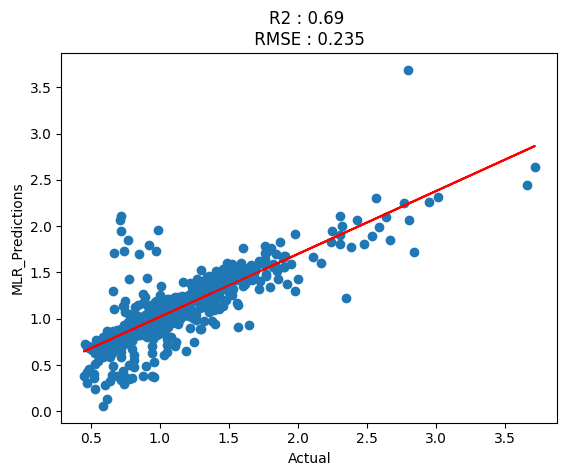

In [19]:
#  Plot

slope, intercept, r, p, std_err = stats.linregress(Y_test, y_pred)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, Y_test))


plt.scatter(Y_test, y_pred)
plt.plot(Y_test, mymodel, color = "r")
plt.xlabel("Actual")
plt.ylabel("MLR_Predictions")

plt.title(f"R2 : {round(R2,2)} \n RMSE : {round(RMSE,3)} ")
plt.show()

In [ ]:
#plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
#plt.title('Feature importances obtained from coefficients', size=20)
#plt.xticks(rotation='vertical')
#plt.show()

In [ ]:
#import matplotlib.pyplot as plt

#courses = ['PRECIPITATION', 'TEMP_MEAN_AVG', 'FREEZE_INDEX', 'ANNUAL_ESAL_TREND',
      # 'ANNUAL_GESAL_TREND', 'AADTT_ALL_TRUCKS_TREND',
      # 'ANNUAL_TRUCK_VOLUME_TREND', 'SN_VALUE','Age', 'IRI0']
#values = model.coef_.tolist()

#fig = plt.figure(figsize = (10, 5))

# creating the bar plot
#plt.bar(courses, values, color ='maroon',
       # width = 0.1)

#plt.xlabel("input variables")
#plt.ylabel("relative weight")
#plt.title("relative importance")
#plt.show()